In [235]:
import pandas as pd
import numpy as np

## Veri Seti Oluşturuldu

In [238]:
gender_list=["Female","Male"]
job_list=["CEO (Chief Executive Officer)",
"COO (Chief Operating Officer)",
"CFO (Chief Financial Officer)",
"CTO (Chief Technology Officer)",
"CMO (Chief Marketing Officer)",
"CHRO (Chief Human Resources Officer)",
"CIO (Chief Information Officer)",
"Product Manager",
"Project Manager",
"Business Development Manager",
"Sales Manager",
"Marketing Specialist",
"Human Resources Specialist",
"Accountant",
"Financial Analyst",
"Software Developer",
"Data Analyst",
"Data Scientist",
"System Administrator",
"Network Engineer",
"Customer Support Specialist",
"UI/UX Designer",
"Graphic Designer",
"Content Writer",
"Legal Counsel",
"Quality Assurance (QA) Engineer",
"Logistics Manager",
"Supply Chain Manager"]
random_gender= np.random.choice(gender_list,size=100)
random_age=np.random.randint(20,65,size=100)
random_jobTitle=np.random.choice(job_list,size=100)
random_salary=np.random.randint(50000,250000,size=100)

In [240]:
calisan_verileri= {
    "Gender":random_gender.tolist(),
    "Age":random_age.tolist(),
    "Job Title":random_jobTitle.tolist(),
    "Salary":random_salary.tolist()
}

In [242]:
df = pd.DataFrame(calisan_verileri)

## Veri Setini Tanıyoruz

In [245]:
df.head(10)

,Gender,Age,Job Title,Salary
0,Female,39,COO (Chief Operating Officer),182148
1,Female,54,Accountant,55347
2,Female,28,Data Scientist,90921
3,Female,23,Sales Manager,234653
4,Female,32,CEO (Chief Executive Officer),245105
5,Female,63,Software Developer,144158
6,Female,46,Content Writer,160129
7,Male,34,Sales Manager,216854
8,Male,64,Quality Assurance (QA) Engineer,80951
9,Male,35,Business Development Manager,129872


In [268]:
df.tail(10)

,Gender,Age,Job Title,Salary
90,Male,21,Network Engineer,124710
91,Female,62,Graphic Designer,53497
92,Female,28,Sales Manager,54388
93,Female,25,System Administrator,191921
94,Male,49,Supply Chain Manager,61807
95,Male,43,Human Resources Specialist,167077
96,Female,60,CMO (Chief Marketing Officer),197630
97,Female,40,Data Scientist,95684
98,Male,50,Logistics Manager,106651
99,Female,41,System Administrator,160681


In [286]:
df.sample(5) #rastgele 5 satır gösterir.

,Gender,Age,Job Title,Salary
97,Female,40,Data Scientist,95684
2,Female,28,Data Scientist,90921
30,Female,49,Content Writer,115822
57,Female,53,Data Analyst,80977
8,Male,64,Quality Assurance (QA) Engineer,80951


In [272]:
df.shape #(satır,kolon)

(100, 4)

In [249]:
df.describe()

,Age,Salary
count,100.000000,100.000000
mean,42.280000,148386.310000
std,13.510251,58775.450274
min,20.000000,53497.000000
25%,31.750000,93486.000000
50%,40.500000,146861.500000
75%,55.000000,197771.250000
max,64.000000,245478.000000


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     100 non-null    object
 1   Age        100 non-null    int64 
 2   Job Title  100 non-null    object
 3   Salary     100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


In [288]:
df.isnull().sum() # Her sütundaki eksik değerlerin sayısını gösterir.

Gender       0
Age          0
Job Title    0
Salary       0
dtype: int64

In [254]:
df["Gender"].value_counts()

Gender
Female    55
Male      45
Name: count, dtype: int64

In [296]:
df["Job Title"].value_counts().head(10)

Job Title
COO (Chief Operating Officer)           7
Software Developer                      7
Sales Manager                           6
Content Writer                          6
Supply Chain Manager                    5
Data Analyst                            5
CHRO (Chief Human Resources Officer)    5
Human Resources Specialist              5
Business Development Manager            4
Legal Counsel                           4
Name: count, dtype: int64

## Belirli Bir Kişinin Maaşına Zam Yapıldı

In [258]:
df["Salary"].iloc[7]

216854

In [262]:
df.loc[7,"Salary"]= 250000 #zam yapıldı

In [264]:
df["Salary"].iloc[7]

250000

## Veri Analizi - İşe Göre Maaş

In [334]:
job_mean_salary=df.groupby("Job Title")["Salary"].mean().sort_values(ascending=False).reset_index()
#İşe göre maaşların ortalamasını bulduk -> df.groupby("Job Title")["Salary"].mean()
#Maaşı yüksekten düşüğe doğru sıraladık -> sort_values(ascending=False)
#indexi sıraladık -> reset_index()

In [338]:
job_mean_salary

,Job Title,Salary
0,Project Manager,212705.000000
1,Sales Manager,193972.000000
2,CMO (Chief Marketing Officer),183887.333333
3,Financial Analyst,180399.000000
4,Product Manager,178146.666667
5,System Administrator,169163.500000
6,Content Writer,163991.333333
7,Business Development Manager,159295.000000
8,Graphic Designer,157360.666667
9,Human Resources Specialist,156981.800000


<Axes: ylabel='Job Title'>

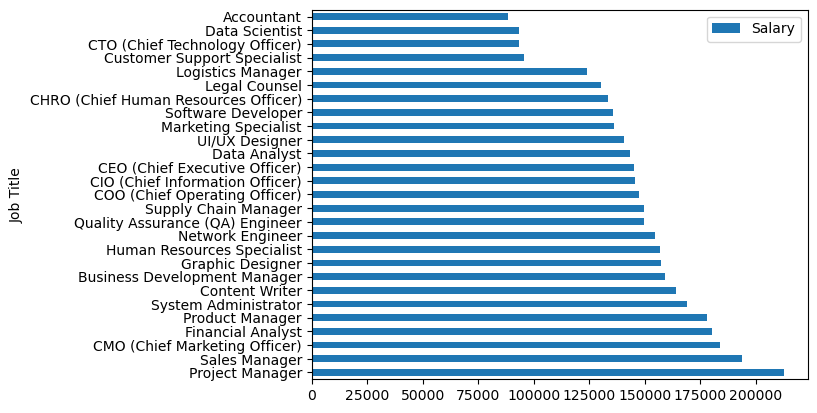

In [342]:
job_mean_salary.plot(x="Job Title",y="Salary",kind="barh")

## Veri Analizi - Belirli Bir İşte Cinsiyete Göre Maaş

In [347]:
female_data_analyst=df[(df["Job Title"]=="Data Analyst") & (df["Gender"]=="Female")]

In [351]:
female_data_analyst

,Gender,Age,Job Title,Salary
25,Female,35,Data Analyst,220246
33,Female,64,Data Analyst,171810
38,Female,51,Data Analyst,57017
57,Female,53,Data Analyst,80977


In [353]:
female_data_analyst["Salary"].mean()

132512.5

In [355]:
male_data_analyst=df[(df["Job Title"]=="Data Analyst") & (df["Gender"]=="Male")]

In [357]:
male_data_analyst

,Gender,Age,Job Title,Salary
49,Male,64,Data Analyst,185717


In [359]:
male_data_analyst["Salary"].mean()

185717.0

## En Yüksek ve En Düşük Maaş Alan Çalışanlar

In [392]:
df.sort_values("Salary",ascending=False).head().reset_index(drop=True)
#drop=True parametresi index kolonunu kaldırır.

,Gender,Age,Job Title,Salary
0,Male,34,Sales Manager,250000
1,Female,24,Software Developer,245478
2,Female,32,CEO (Chief Executive Officer),245105
3,Female,39,Content Writer,243006
4,Male,25,Sales Manager,242820


In [433]:
df.nlargest(5,"Salary").reset_index(drop=True) #en yüksek maaşlı 5 kişi, yukarıdaki kod ile aynı sonuç.

,Gender,Age,Job Title,Salary
0,Male,34,Sales Manager,250000
1,Female,24,Software Developer,245478
2,Female,32,CEO (Chief Executive Officer),245105
3,Female,39,Content Writer,243006
4,Male,25,Sales Manager,242820


In [431]:
df.nsmallest(5,"Salary").reset_index(drop=True) #en düşük maaşlı 5 kişi 

,Gender,Age,Job Title,Salary
0,Female,62,Graphic Designer,53497
1,Female,21,UI/UX Designer,53844
2,Female,28,Sales Manager,54388
3,Female,52,Customer Support Specialist,55216
4,Female,54,Accountant,55347


## Çalışan Yaş Dağılımı

<Axes: ylabel='Frequency'>

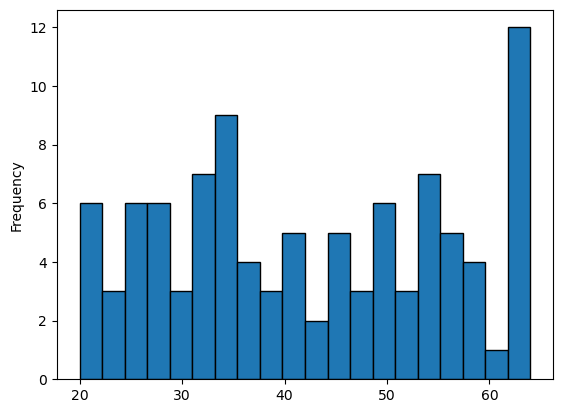

In [452]:
df['Age'].plot(kind='hist', bins=20, edgecolor='black')

## Cinsiyet Bazında Ortalama Maaşlar

In [455]:
gender_mean_salary= df.groupby("Gender")["Salary"].mean()

In [457]:
gender_mean_salary

Gender
Female    146065.981818
Male      151958.844444
Name: Salary, dtype: float64

<Axes: xlabel='Gender'>

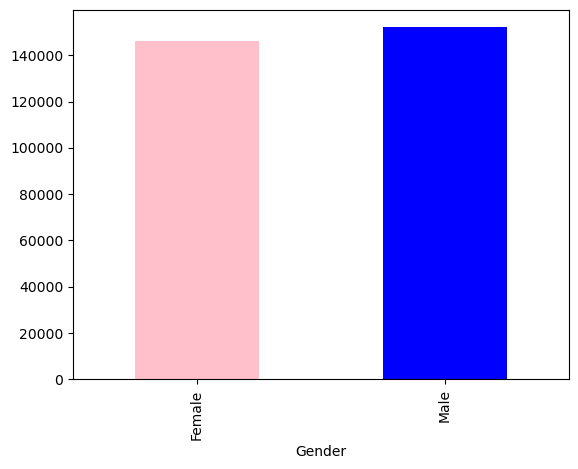

In [467]:
gender_mean_salary.plot(x="Gender",y="Salary",kind="bar",color=["pink","blue"])

## Yaşa Göre Maaş Dağılımı

In [515]:
age_salary= df.groupby("Age")["Salary"].mean()

In [529]:
age_salary=pd.DataFrame(age_salary).reset_index()

In [535]:
age_salary.head()

,Age,Salary
0,20,126663.00
1,21,126513.75
2,22,181004.00
3,23,218965.00
4,24,245478.00


<Axes: xlabel='Age', ylabel='Salary'>

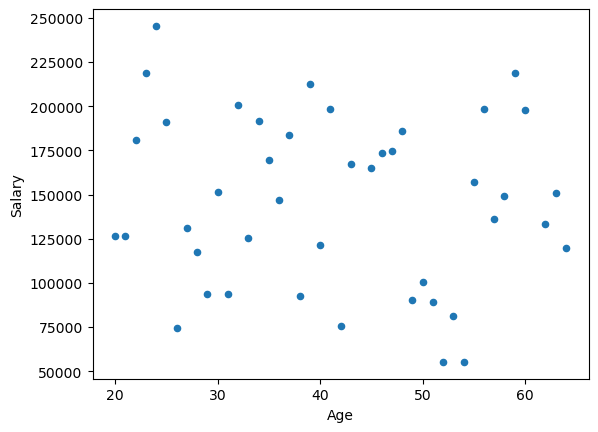

In [531]:
age_salary.plot(x="Age", y="Salary", kind="scatter")

## Pozisyon Dağılımı

In [598]:
job_count = df['Job Title'].value_counts()

In [600]:
job_count

Job Title
COO (Chief Operating Officer)           7
Software Developer                      7
Sales Manager                           6
Content Writer                          6
Supply Chain Manager                    5
Data Analyst                            5
CHRO (Chief Human Resources Officer)    5
Human Resources Specialist              5
Business Development Manager            4
Legal Counsel                           4
System Administrator                    4
UI/UX Designer                          4
Marketing Specialist                    4
CMO (Chief Marketing Officer)           3
Logistics Manager                       3
Graphic Designer                        3
Product Manager                         3
CEO (Chief Executive Officer)           3
CIO (Chief Information Officer)         3
Network Engineer                        3
Customer Support Specialist             3
Financial Analyst                       2
Data Scientist                          2
Accountant              

<Axes: ylabel='count'>

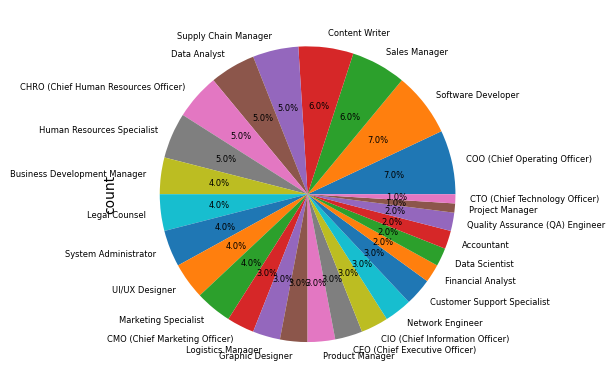

In [604]:
job_count.plot(kind="pie",fontsize=6,autopct='%1.1f%%')